In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist
%matplotlib inline


In [18]:
data=pd.read_csv('Q11_Cluster_2.csv')
data.head()

,record,status,Q1_level,Q2_industry,Q3_department,Q7_role,Q11r1,Q11r2,Q11r3,Q11r4,...,Q11r8,Q11r9,Q11r10,Q11r11,Q11r12,Q11r13,Q11r14,Q11r15,Q11r16,Q11r17
0,7,3,6,2,2,2,0,1,1,1,...,0,1,1,0,1,0,1,1,0,0
1,8,3,6,5,1,6,0,1,1,0,...,1,0,1,0,0,0,1,0,0,0
2,9,3,3,1,3,1,0,1,1,0,...,1,0,1,1,0,1,1,1,0,0
3,10,3,6,2,5,7,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
4,11,3,4,3,2,2,1,0,0,1,...,0,1,1,0,0,1,0,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   record         900 non-null    int64
 1   status         900 non-null    int64
 2   Q1_level       900 non-null    int64
 3   Q2_industry    900 non-null    int64
 4   Q3_department  900 non-null    int64
 5   Q7_role        900 non-null    int64
 6   Q11r1          900 non-null    int64
 7   Q11r2          900 non-null    int64
 8   Q11r3          900 non-null    int64
 9   Q11r4          900 non-null    int64
 10  Q11r5          900 non-null    int64
 11  Q11r6          900 non-null    int64
 12  Q11r7          900 non-null    int64
 13  Q11r8          900 non-null    int64
 14  Q11r9          900 non-null    int64
 15  Q11r10         900 non-null    int64
 16  Q11r11         900 non-null    int64
 17  Q11r12         900 non-null    int64
 18  Q11r13         900 non-null    int64
 19  Q11r14  

In [20]:
"""

[status]: Participant status		
Values: 1-4		
	1	Terminated
	2	Overquota
	3	Qualified
	4	Partial


[Q1]: What is your level in your organization?		
Values: 1-7		
	1	Currently Unemployed
	2	Entry level
	3	Intermediate/Experienced
	4	Senior
	5	Manager
	6	Director
	7	Executive/C-level

[Q2]: Which of the following industries most closely matches that of your organization?		
Values: 1-9		
	1	Advertisers (e.g. companies in CPG, Auto, Pharma, Travel, Insurance and Financial Services that place ads)
	2	Media/Ad Agency
	3	Digital Publishers
	4	Content Owners
	5	TV Network/Station
	6	Radio Network/Station/Podcaster
	7	Digital Ad Platform
	8	Multichannel Video Programming Distributor (MVPD)
	9	None of the above

[Q3]: Which organizational department or division most closely resembles the one in which you work?		
Values: 1-7		
	1	Analytics and Research (e.g. campaign measurement team)
	2	Sales (e.g. client growth team)
	3	Marketing Communications (e.g. marketing/communications managers, planners, strategists)
	4	Distribution (e.g. ad traffic controllers, production managers)
	5	Engineering (e.g. technical/analytical product development team)
	6	Creative/Content Development (e.g. designers, copy writers, illustrators etc)
	7	None of the above

[Q7]: When thinking about your work, how would you describe your primary role?		
Values: 1-7		
	1	Building marketing and communications plans and crafting media strategies
	2	Driving sales, revenue and business growth
	3	Optimizing campaign performance
	4	Creating ad content production and publication
	5	Executing and trafficking campaigns
	6	Building analytical tools to pull data 
	7	Planning and managing campaign performance measurement studies


"""

'\n\n[status]: Participant status\t\t\nValues: 1-4\t\t\n\t1\tTerminated\n\t2\tOverquota\n\t3\tQualified\n\t4\tPartial\n\n\n[Q1]: What is your level in your organization?\t\t\nValues: 1-7\t\t\n\t1\tCurrently Unemployed\n\t2\tEntry level\n\t3\tIntermediate/Experienced\n\t4\tSenior\n\t5\tManager\n\t6\tDirector\n\t7\tExecutive/C-level\n\n[Q2]: Which of the following industries most closely matches that of your organization?\t\t\nValues: 1-9\t\t\n\t1\tAdvertisers (e.g. companies in CPG, Auto, Pharma, Travel, Insurance and Financial Services that place ads)\n\t2\tMedia/Ad Agency\n\t3\tDigital Publishers\n\t4\tContent Owners\n\t5\tTV Network/Station\n\t6\tRadio Network/Station/Podcaster\n\t7\tDigital Ad Platform\n\t8\tMultichannel Video Programming Distributor (MVPD)\n\t9\tNone of the above\n\n[Q3]: Which organizational department or division most closely resembles the one in which you work?\t\t\nValues: 1-7\t\t\n\t1\tAnalytics and Research (e.g. campaign measurement team)\n\t2\tSales (e.g. c

In [22]:
"""
[Q3]: Which organizational department or division most closely resembles the one in which you work?		
Values: 1-7		
	1	Analytics and Research (e.g. campaign measurement team)
	2	Sales (e.g. client growth team)
	3	Marketing Communications (e.g. marketing/communications managers, planners, strategists)
	4	Distribution (e.g. ad traffic controllers, production managers)
	5	Engineering (e.g. technical/analytical product development team)
	6	Creative/Content Development (e.g. designers, copy writers, illustrators etc)
	7	None of the above
"""


data= data[(data.Q3_department == 3)].copy()

In [24]:
data2=data.drop(['record','status','Q1_level','Q2_industry','Q3_department','Q7_role'],axis=1)
data2

,Q11r1,Q11r2,Q11r3,Q11r4,Q11r5,Q11r6,Q11r7,Q11r8,Q11r9,Q11r10,Q11r11,Q11r12,Q11r13,Q11r14,Q11r15,Q11r16,Q11r17
2,0,1,1,0,1,0,0,1,0,1,1,0,1,1,1,0,0
8,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1
9,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
11,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
15,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
895,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,0
898,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0


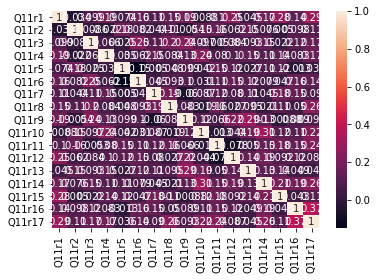

In [25]:
corrMatrix = data2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

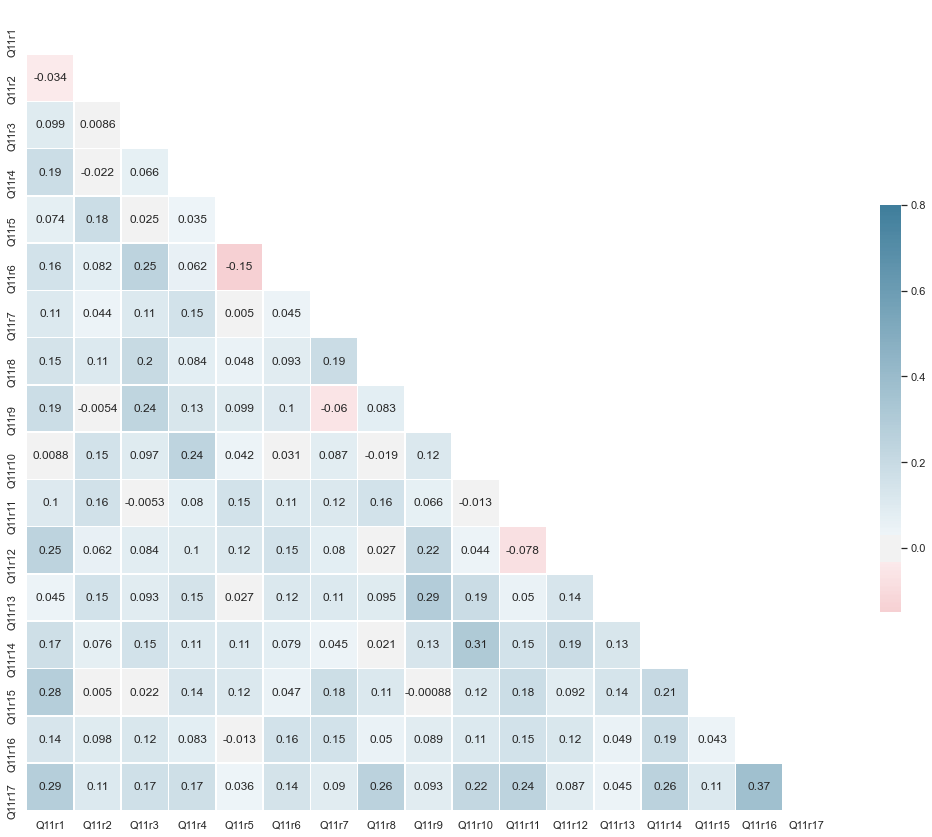

In [26]:
sns.set(style="white")

# Compute the correlation matrix
corr = data2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
from sklearn.cluster import KMeans

In [32]:
km=KMeans(n_clusters=7,max_iter=1000)

In [33]:
km.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
km.cluster_centers_

array([[ 9.47368421e-01,  8.94736842e-01,  8.42105263e-01,
         9.47368421e-01,  7.36842105e-01,  7.36842105e-01,
         1.00000000e+00,  1.00000000e+00,  8.42105263e-01,
         7.89473684e-01,  7.36842105e-01,  6.84210526e-01,
         7.89473684e-01,  7.89473684e-01,  8.42105263e-01,
         6.84210526e-01,  8.94736842e-01],
       [ 7.94117647e-01,  7.64705882e-01,  8.52941176e-01,
         2.35294118e-01,  2.94117647e-01,  6.47058824e-01,
         7.35294118e-01,  7.64705882e-01,  4.11764706e-01,
         5.88235294e-02,  4.41176471e-01,  3.52941176e-01,
         1.76470588e-01,  1.47058824e-01,  5.88235294e-02,
         2.64705882e-01,  3.23529412e-01],
       [ 2.43902439e-01,  6.82926829e-01,  2.19512195e-01,
         2.19512195e-01,  8.29268293e-01,  1.66533454e-16,
         2.19512195e-01,  6.09756098e-01,  4.39024390e-01,
         1.21951220e-01,  3.65853659e-01,  2.43902439e-01,
         3.17073171e-01,  1.95121951e-01,  2.68292683e-01,
         9.75609756e-02, -5.5

In [35]:
km.labels_

array([2, 6, 2, 0, 1, 1, 1, 5, 2, 4, 5, 4, 5, 1, 5, 5, 2, 5, 1, 3, 4, 0,
       3, 6, 5, 0, 3, 1, 2, 6, 3, 6, 1, 1, 3, 1, 2, 1, 2, 4, 2, 2, 2, 2,
       6, 3, 4, 2, 2, 4, 2, 2, 6, 6, 2, 4, 1, 1, 4, 4, 1, 2, 6, 6, 1, 2,
       6, 6, 4, 4, 2, 2, 2, 2, 6, 4, 6, 6, 2, 4, 5, 0, 0, 6, 0, 1, 0, 5,
       5, 1, 6, 6, 4, 0, 5, 2, 4, 3, 2, 5, 0, 0, 0, 0, 5, 4, 1, 3, 6, 1,
       3, 2, 5, 3, 1, 3, 5, 3, 6, 4, 3, 3, 2, 6, 4, 1, 0, 5, 2, 2, 4, 4,
       3, 1, 0, 1, 6, 5, 2, 5, 1, 0, 1, 5, 2, 2, 2, 2, 6, 1, 4, 1, 2, 6,
       6, 1, 1, 5, 6, 1, 6, 1, 4, 6, 1, 4, 1, 3, 5, 3, 5, 1, 2, 5, 4, 5,
       0, 0, 0, 4, 2, 2, 6, 3, 1, 6, 4, 2, 3, 2, 6, 3, 4, 3, 4, 6, 3, 4,
       3, 0, 5, 4, 3, 4, 4, 5, 2, 3, 6, 4, 5, 4, 5])

In [40]:
data['predicted_label']=km.labels_
#Adding one to column for read ability sake
data['predicted_label'] += 1

#View data again
data

,record,status,Q1_level,Q2_industry,Q3_department,Q7_role,Q11r1,Q11r2,Q11r3,Q11r4,...,Q11r9,Q11r10,Q11r11,Q11r12,Q11r13,Q11r14,Q11r15,Q11r16,Q11r17,predicted_label
2,9,3,3,1,3,1,0,1,1,0,...,0,1,1,0,1,1,1,0,0,3
8,20,3,2,7,3,1,0,1,1,1,...,0,1,0,0,1,0,0,0,1,7
9,18,3,7,7,3,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,3
11,19,3,7,3,3,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
15,25,3,7,2,3,1,1,1,1,0,...,1,0,1,1,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2859,3,6,6,3,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,7
895,2864,3,5,5,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
896,2868,3,6,5,3,1,1,1,1,0,...,1,0,1,1,0,1,1,1,0,6
898,2891,3,6,5,3,3,0,0,0,1,...,0,1,0,0,0,0,0,0,0,5


In [41]:
pd.crosstab(data.Q7_role,data.predicted_label)

predicted_label,1,2,3,4,5,6,7
Q7_role,,,,,,,
1,10,33,31,17,16,21,21
2,1,1,0,2,5,3,3
3,1,0,2,1,4,0,2
4,3,0,5,4,2,0,2
5,2,0,2,1,2,2,1
6,0,0,0,0,2,0,0
7,2,0,1,0,3,2,3


In [42]:
#Export to CSV
data.to_csv ('clusters2.csv', index = False, header=True)

In [29]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2)
    kmeanModel.fit(data2)     
      
    distortions.append(sum(np.min(cdist(data2, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data2.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data2, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data2.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


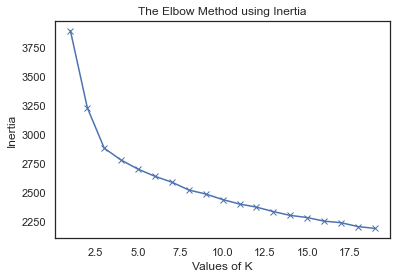

In [30]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

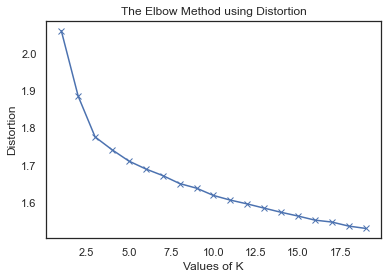

In [31]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 